## Isolation Forest for Anomaly Detection
**Objective**: Understand and apply the Isolation Forest algorithm to identify anomalies in datasets.

### Task: Anomaly Detection in Financial Transactions
**Steps**:
1. Import Libraries
2. Load Dataset
3. Apply Isolation Forest
4. Visualize Anomalies

anomaly
normal     285
anomaly     15
Name: count, dtype: int64


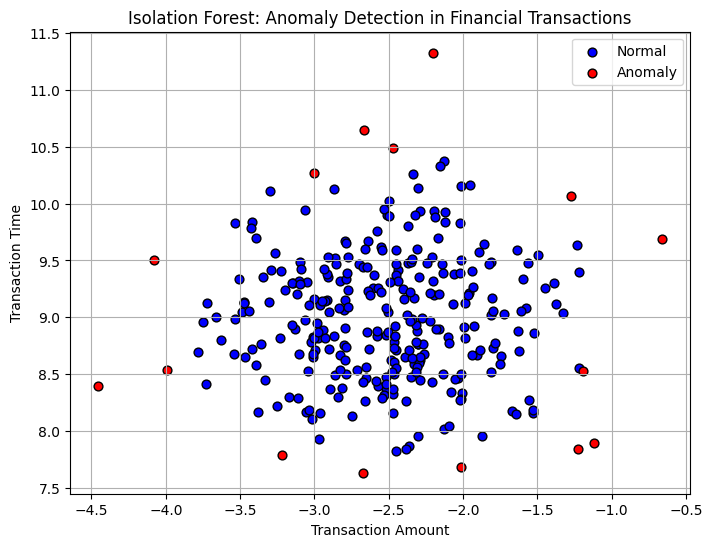

In [1]:
# write your code from here

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.datasets import make_blobs

# Step 1: Generate synthetic financial-like data
# Features: 'Amount' and 'Time'
X, _ = make_blobs(n_samples=300, centers=1, cluster_std=0.6, random_state=42)
df = pd.DataFrame(X, columns=['Amount', 'Time'])

# Step 2: Apply Isolation Forest
model = IsolationForest(contamination=0.05, random_state=42)
model.fit(df)

# Predict anomalies (-1 = anomaly, 1 = normal)
df['anomaly'] = model.predict(df)
df['anomaly'] = df['anomaly'].map({1: 'normal', -1: 'anomaly'})

# Step 3: Print anomaly counts
print(df['anomaly'].value_counts())

# Step 4: Visualize the results
plt.figure(figsize=(8, 6))

# Normal points in blue
plt.scatter(df[df['anomaly'] == 'normal']['Amount'],
            df[df['anomaly'] == 'normal']['Time'],
            c='blue', label='Normal', edgecolor='k', s=40)

# Anomalies in red
plt.scatter(df[df['anomaly'] == 'anomaly']['Amount'],
            df[df['anomaly'] == 'anomaly']['Time'],
            c='red', label='Anomaly', edgecolor='k', s=40)

plt.title("Isolation Forest: Anomaly Detection in Financial Transactions")
plt.xlabel("Transaction Amount")
plt.ylabel("Transaction Time")
plt.legend()
plt.grid(True)
plt.show()